In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text
import numpy as np

import nfl_data_py as nfl

In [2]:
data = pd.read_csv('../data/rushing.csv')

In [3]:
data.head()

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,1D,YBC,YBC/Att,YAC,YAC/Att,BrkTkl,Att/Br,Season
0,1,Derrick Henry*,TEN,28,RB,16,16,349,1538,13,65.0,739,2.1,799,2.3,35,10.0,2022
1,2,Josh Jacobs*+,LVR,24,RB,17,17,340,1653,12,93.0,832,2.4,821,2.4,31,11.0,2022
2,3,Nick Chubb*,CLE,27,RB,17,17,302,1525,12,69.0,830,2.7,695,2.3,28,10.8,2022
3,4,Saquon Barkley*,NYG,25,RB,16,16,295,1312,10,62.0,749,2.5,563,1.9,12,24.6,2022
4,5,Najee Harris,PIT,24,RB,17,17,272,1034,7,45.0,577,2.1,457,1.7,21,13.0,2022


In [4]:
data['Player'] = data['Player'].replace('[^a-zA-Z0-9\s-]', '', regex=True)


In [5]:
df = data[(data['Pos'] == 'RB') & (data['Season'] == 2022) & (data['Att'] >= 100)]

In [6]:
teams = nfl.import_team_desc()

In [7]:
df['Tm'] = df['Tm'].replace(
    {'KAN': 'KC', 'GNB': 'GB', 'SFO': 'SF', 'NOR': 'NO', 'TAM': 'TB', 'LVR': 'LV', 'NWE': 'NE'})

/tmp/ipykernel_10641/1442095613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tm'] = df['Tm'].replace(


In [8]:
# Merge onto teams
df = df.merge(teams, left_on='Tm', right_on='team_abbr', how='left')

In [9]:
# if Tm is 2TM then, team_color and team_color 2 = #000000
for i in range(len(df)):
    if df['Tm'][i] == '2TM':
        df['team_color'][i] = '#000000'
        df['team_color2'][i] = '#000000'

/tmp/ipykernel_10641/3796773091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_color'][i] = '#000000'
/tmp/ipykernel_10641/3796773091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_color2'][i] = '#000000'
/tmp/ipykernel_10641/3796773091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_color'][i] = '#000000'
/tmp/ipykernel_10641/3796773091.py:5: SettingWithCopyWarning: 
A value is trying to be set

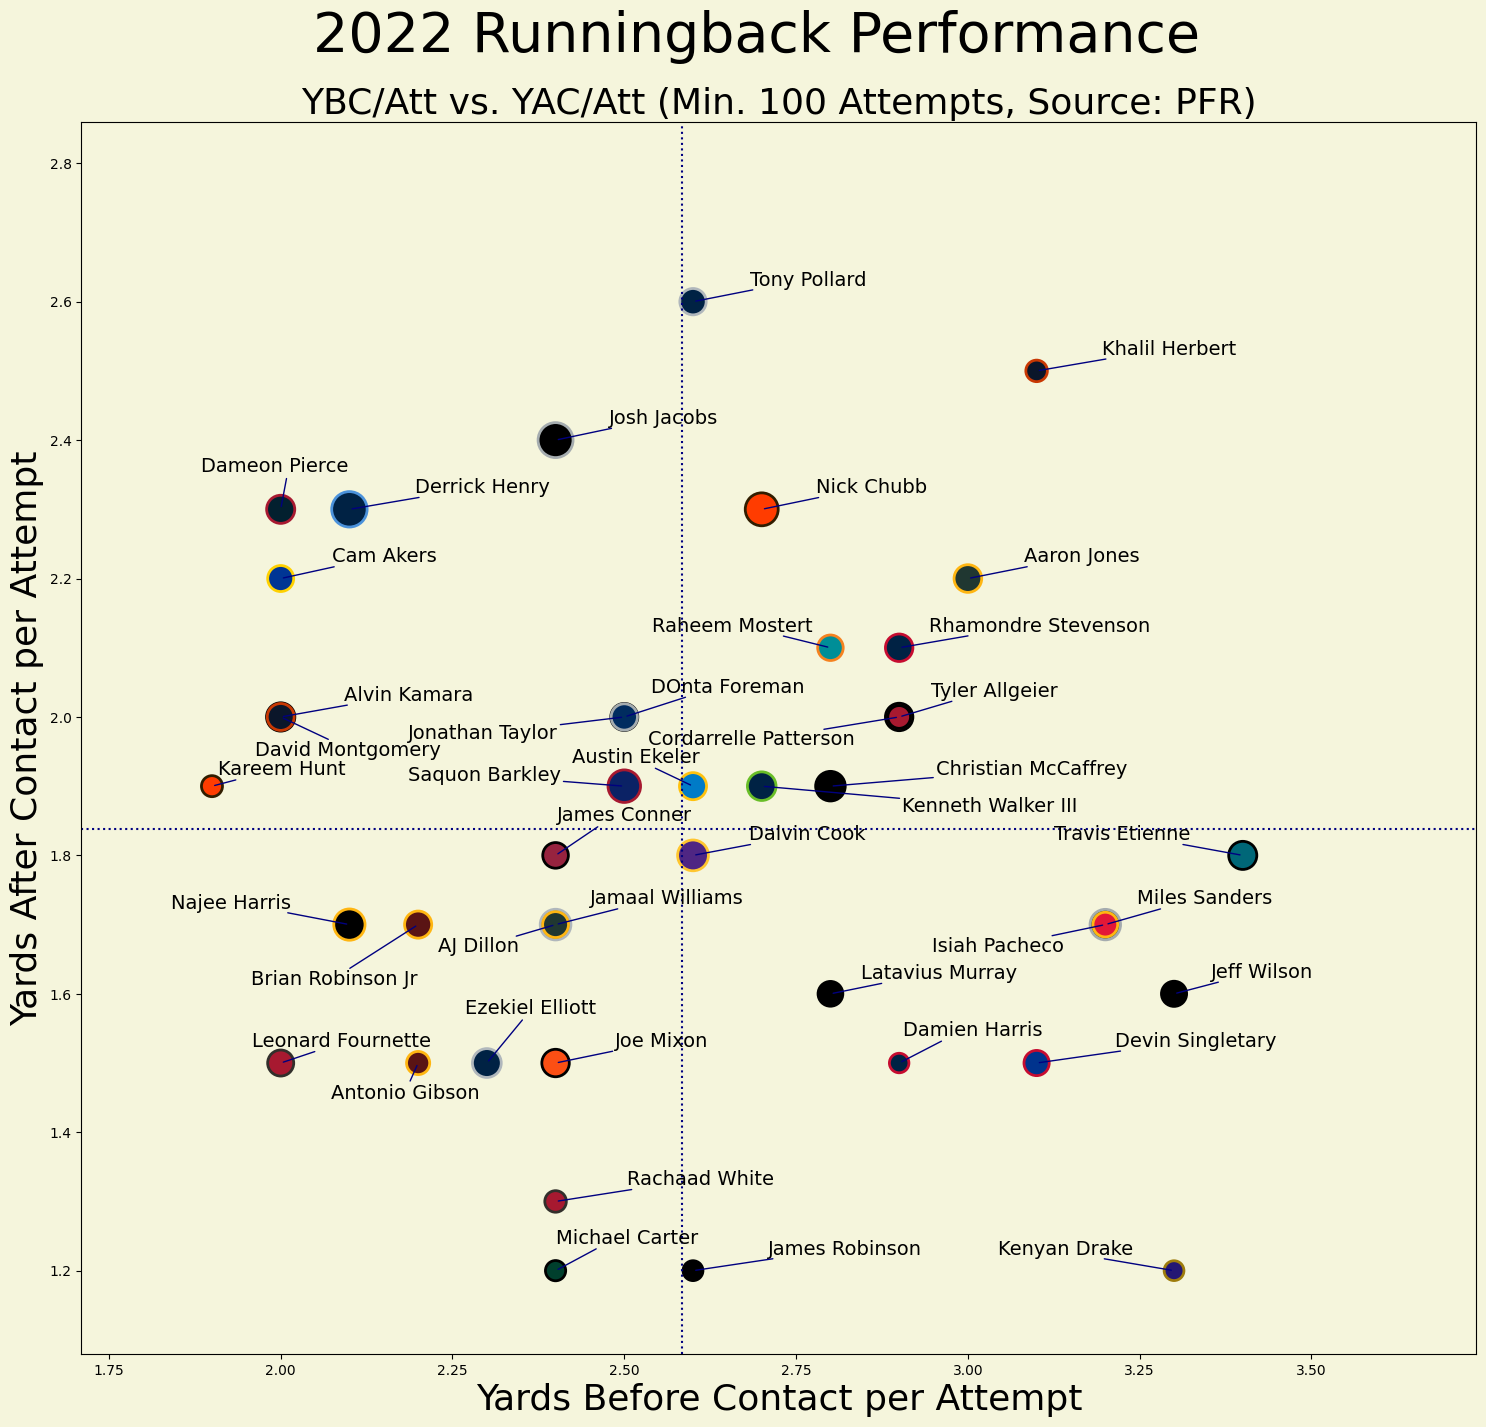

In [10]:
fig, ax = plt.subplots(figsize=(18, 16))

fig.patch.set_facecolor('beige')
ax.set_facecolor('beige')

# Use scatter points instead of logos
# adjust size of points relative to 'Att'
point_size = df['Att'] / max(df['Att']) * 650
scatter = ax.scatter(df['YBC/Att'], df['YAC/Att'], c=df['team_color'],
                     s=point_size, edgecolor=df['team_color2'], linewidth=2)

texts = []
for x0, y0, player in zip(df['YBC/Att'], df['YAC/Att'], df['Player']):
    texts.append(ax.text(x0, y0, player, fontsize=14))

# Adjust text labels
adjust_text_params = {
    'texts': texts,
    'expand_points': (2.2, 2.5),
    'expand_text': (1.5, 2),
    'arrowprops': {
        'arrowstyle': '-',
        'color': 'navy',
    },
}
adjust_text(**adjust_text_params)

plt.suptitle("2022 Runningback Performance",
             fontsize=40, y=0.95, ha='center')
plt.title("YBC/Att vs. YAC/Att (Min. 100 Attempts, Source: PFR)",
          fontsize=26, y=1.0, ha='center')
plt.xlabel('Yards Before Contact per Attempt', fontsize=26)
plt.ylabel('Yards After Contact per Attempt', fontsize=26)

# make the axes limits +10% of the max value
x_max = df['YBC/Att'].max()
y_max = df['YAC/Att'].max()

# make the axes minimums -10% of the max value
x_min = df['YBC/Att'].min()
y_min = df['YAC/Att'].min()

# set the axes limits
plt.xlim(x_min * 0.9, x_max * 1.1)
plt.ylim(y_min * 0.9, y_max * 1.1)

# Draw horizontal and vertical lines at the mean of each axis
mean_y = df['YAC/Att'].mean()
mean_x = df['YBC/Att'].mean()

plt.axhline(mean_y, color='navy', linestyle='dotted')
plt.axvline(mean_x, color='navy', linestyle='dotted')

# Save the plot as a high-quality image
plt.savefig('../images/advanced_rushing.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [11]:
df = data.copy()

In [12]:
df = df[(df['Pos'] == 'RB') & (df['Att'] >= 100)]


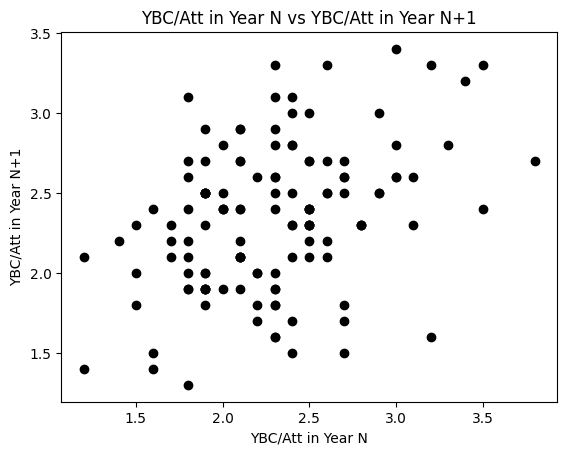

In [13]:
# Sort the DataFrame
df = df.sort_values(by=['Player', 'Season'])

# Initialize lists to hold YBC/Att for year N and N+1
ybc_att_N = []
ybc_att_N_plus_1 = []

# Iterate through the DataFrame to compare YBC/Att between consecutive years for the same player
for i in range(len(df) - 1):
    if df.iloc[i]['Player'] == df.iloc[i + 1]['Player']:
        ybc_att_N.append(df.iloc[i]['YBC/Att'])
        ybc_att_N_plus_1.append(df.iloc[i + 1]['YBC/Att'])

# Plot the scatter plot
plt.scatter(ybc_att_N, ybc_att_N_plus_1, c='black')
plt.title('YBC/Att in Year N vs YBC/Att in Year N+1')
plt.xlabel('YBC/Att in Year N')
plt.ylabel('YBC/Att in Year N+1')
plt.show()

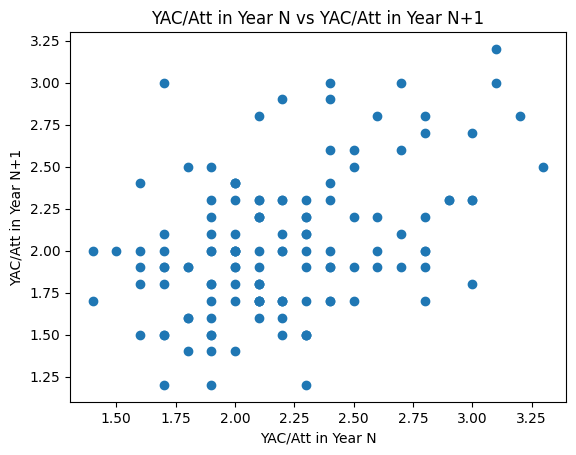

In [14]:
# Initialize lists to hold YAC/Att for year N and N+1
yac_att_N = []
yac_att_N_plus_1 = []

# Iterate through the DataFrame to compare YAC/Att between consecutive years for the same player
for i in range(len(df) - 1):
    if df.iloc[i]['Player'] == df.iloc[i + 1]['Player']:
        yac_att_N.append(df.iloc[i]['YAC/Att'])
        yac_att_N_plus_1.append(df.iloc[i + 1]['YAC/Att'])

# Plot the scatter plot
plt.scatter(yac_att_N, yac_att_N_plus_1)
plt.title('YAC/Att in Year N vs YAC/Att in Year N+1')
plt.xlabel('YAC/Att in Year N')
plt.ylabel('YAC/Att in Year N+1')
plt.show()